In [8]:
import tweepy           
import pandas as pd    
import numpy as np

In [9]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
from credentials import *

In [11]:
def twitter_setup():
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth)
    return api

In [15]:
extractor = twitter_setup()

tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=500)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

print("5 recent tweets:\n")
for tweet in tweets[:100]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

https://t.co/GIzwKSbuuS

Just had a conf call w/ major lenders discussing our Great Small Businesses &amp; the #PPPloan. I ask every company, bi… https://t.co/sPAAzbiDj9

Wisconsin, get out and vote NOW for Justice Daniel Kelly. Protect your 2nd Amendment!

Why didn’t the I.G., who spent 8 years with the Obama Administration (Did she Report on the failed H1N1 Swine Flu d… https://t.co/t0hdxZyFP5

The W.H.O. really blew it. For some reason, funded largely by the United States, yet very China centric. We will be… https://t.co/3C2NWDafia

RT @AmberSmithUSA: President Trump 'to get involved' in Thomas Modly-Capt. Brett Crozier dispute  https://t.co/k0yWHeIjvc

Vote today, Tuesday, for highly respected Republican, Justice Daniel Kelly. Tough on Crime, loves your Military, Ve… https://t.co/mcpxQG0Sav

RT @realDonaldTrump: Congratulations to State Representative Karen Whitsett of Michigan. So glad you are getting better! https://t.co/v6z46…


In [16]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(data.head(10))

,Tweets
0,https://t.co/GIzwKSbuuS
1,Just had a conf call w/ major lenders discussi...
2,"Wisconsin, get out and vote NOW for Justice Da..."
3,"Why didn’t the I.G., who spent 8 years with th..."
4,"The W.H.O. really blew it. For some reason, fu..."
5,RT @AmberSmithUSA: President Trump 'to get inv...
6,"Vote today, Tuesday, for highly respected Repu..."
7,RT @realDonaldTrump: Congratulations to State ...
8,Great job being done by Dr. Nicole Saphier on ...
9,https://t.co/oUFOV2HQLo


In [17]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [18]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1247624946005803008
2020-04-07 20:39:01
Twitter for iPhone
5867
1669
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1245754938954780674, 'id_str': '1245754938954780674', 'indices': [0, 23], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1245754938954780674/pu/img/76zMhu4nyzp9E4Z2.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1245754938954780674/pu/img/76zMhu4nyzp9E4Z2.jpg', 'url': 'https://t.co/GIzwKSbuuS', 'display_url': 'pic.twitter.com/GIzwKSbuuS', 'expanded_url': 'https://twitter.com/realDonaldTrump/status/1245754978880241666/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}, 'small': {'w': 680, 'h': 383, 'resize': 'fit'}, 'large': {'w': 1280, 'h': 720, 'resize': 'fit'}}, 'source_status_id': 1245754978880241666, 'source_status_id_str': '1245754978880241666', 'source_user_id': 25073877, 'source_user_id_str': '25073877'}]}


In [19]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [20]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,https://t.co/GIzwKSbuuS,23,1247624946005803008,2020-04-07 20:39:01,Twitter for iPhone,5867,1669
1,Just had a conf call w/ major lenders discussi...,144,1247615892894220292,2020-04-07 20:03:03,Twitter for iPhone,21100,6118
2,"Wisconsin, get out and vote NOW for Justice Da...",85,1247546362473975809,2020-04-07 15:26:45,Twitter for iPhone,82364,21106
3,"Why didn’t the I.G., who spent 8 years with th...",140,1247545358705664002,2020-04-07 15:22:46,Twitter for iPhone,99090,27947
4,"The W.H.O. really blew it. For some reason, fu...",140,1247540701291638787,2020-04-07 15:04:16,Twitter for iPhone,271908,71919
5,RT @AmberSmithUSA: President Trump 'to get inv...,121,1247521746976038914,2020-04-07 13:48:56,Twitter for iPhone,0,3853
6,"Vote today, Tuesday, for highly respected Repu...",140,1247382518376140800,2020-04-07 04:35:42,Twitter for iPhone,73447,20334
7,RT @realDonaldTrump: Congratulations to State ...,140,1247370769023328256,2020-04-07 03:49:01,Twitter for iPhone,0,29262
8,Great job being done by Dr. Nicole Saphier on ...,55,1247368253367861249,2020-04-07 03:39:01,Twitter for iPhone,81601,12390
9,https://t.co/oUFOV2HQLo,23,1247366539365486592,2020-04-07 03:32:12,Twitter for iPhone,41172,9768


In [21]:
mean = np.mean(data['len'])

In [22]:
print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 107.28


In [23]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
LIGHT AT THE END OF THE TUNNEL!
Number of likes: 396398
31 characters.

The tweet with more retweets is: 
RT @realDonaldTrump: THE UNITED STATES LOVES ITALY! https://t.co/DESUJ4QM41
Number of retweets: 115744
75 characters.



In [24]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

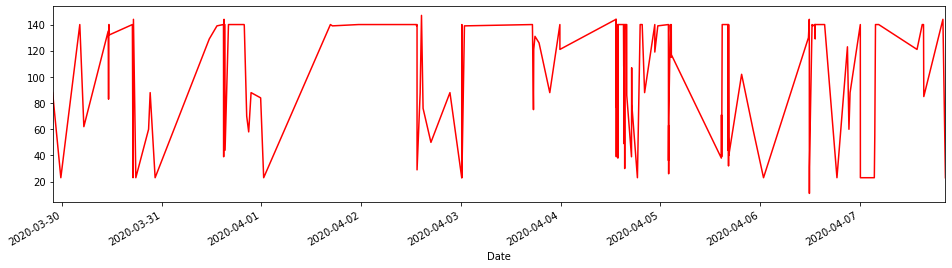

In [25]:
tlen.plot(figsize=(16,4), color='r');

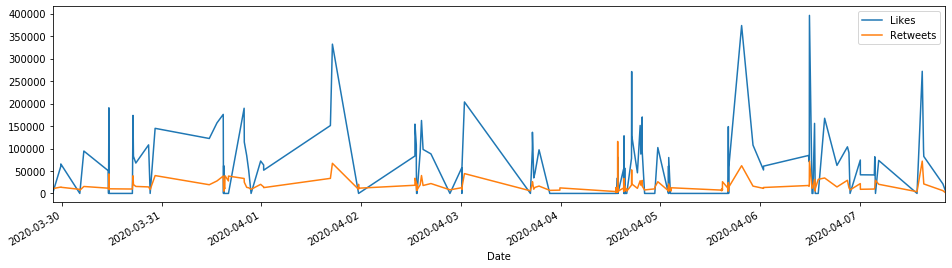

In [26]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [30]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [31]:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

In [32]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,https://t.co/GIzwKSbuuS,23,1247624946005803008,2020-04-07 20:39:01,Twitter for iPhone,5867,1669,0
1,Just had a conf call w/ major lenders discussi...,144,1247615892894220292,2020-04-07 20:03:03,Twitter for iPhone,21100,6118,1
2,"Wisconsin, get out and vote NOW for Justice Da...",85,1247546362473975809,2020-04-07 15:26:45,Twitter for iPhone,82364,21106,0
3,"Why didn’t the I.G., who spent 8 years with th...",140,1247545358705664002,2020-04-07 15:22:46,Twitter for iPhone,99090,27947,-1
4,"The W.H.O. really blew it. For some reason, fu...",140,1247540701291638787,2020-04-07 15:04:16,Twitter for iPhone,271908,71919,1
5,RT @AmberSmithUSA: President Trump 'to get inv...,121,1247521746976038914,2020-04-07 13:48:56,Twitter for iPhone,0,3853,1
6,"Vote today, Tuesday, for highly respected Repu...",140,1247382518376140800,2020-04-07 04:35:42,Twitter for iPhone,73447,20334,-1
7,RT @realDonaldTrump: Congratulations to State ...,140,1247370769023328256,2020-04-07 03:49:01,Twitter for iPhone,0,29262,1
8,Great job being done by Dr. Nicole Saphier on ...,55,1247368253367861249,2020-04-07 03:39:01,Twitter for iPhone,81601,12390,1
9,https://t.co/oUFOV2HQLo,23,1247366539365486592,2020-04-07 03:32:12,Twitter for iPhone,41172,9768,0


In [33]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [34]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 50.0%
Percentage of neutral tweets: 35.0%
Percentage de negative tweets: 15.0%
